# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [25]:
import pandas as pd
import numpy as np
path ="../assets/billboard.csv"

df = pd.read_csv(path)

df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#checking the data types for all columns
df.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

##### Write a brief description of your data, and any interesting observations you've made thus far. 

Billboard.csv gives you a raw data of all the music that has been on the billboard chart in the year of 2000. The data needs to be cleaned up since there are a lot of NaN or missing data.

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [27]:
#changing this column to float. This column happened to be the only int column for weeks
df['x1st.week'] = df['x1st.week'].astype(float)

#rename columns
df = df.rename(columns={'artist.inverted': 'name', 'time': 'length'}) 

#a function to to clean the column names
def cleanColumnNames(val):
    if 'week' in val.lower(): 
        strSplit = val.split(".") 
        weekIndex = strSplit[0]
        replaceX = weekIndex.replace("x","") 
        replacedValues = replaceX.replace("st","").replace("nd","").replace("rd","").replace("th","")
        newVal = strSplit[1] + " " + replacedValues 
        return newVal 
    return val

#cleaning column names
finalVal = [cleanColumnNames(x) for x in df.columns.tolist()]
df.columns = finalVal
df.head()

,year,name,track,length,genre,date.entered,date.peaked,week 1,week 2,week 3,...,week 67,week 68,week 69,week 70,week 71,week 72,week 73,week 74,week 75,week 76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41.0,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57.0,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [28]:
#a function to drop the word "week" in columns
def deleteWeek(val):
    if 'week' in val.lower() :
        strSplit = val.split(" ")
        weekIndex = int(strSplit[1])
        return weekIndex
    return val

#applying to columns
weekStuff = [deleteWeek(x) for x in df.columns.tolist()]
df.columns = weekStuff

#seperate columns to keep and transpose
keepColumn = df.columns[1:7].tolist()
weekColumn = df.columns[7:].tolist()

#using melt to transpose the ranking and the week
newDF = pd.melt(df, id_vars=keepColumn ,value_vars=weekColumn, var_name='Week', value_name = 'Ranking')
newDF = newDF.dropna()
newDF.dtypes
newDF['Week'] = newDF['Week'].astype(int)
newDF['Ranking'] = newDF['Ranking'].astype(int)
newDF.sort_values('name')
#newDF.to_csv("../assets/billboardClean.csv")
newDF.head(10)

newDFSorted = newDF.sort_values(['Week', 'Ranking'], ascending = True)
newDFSorted.groupby(["name", "track"], as_index=True)
newDFSorted.head(10)


,name,track,length,genre,date.entered,date.peaked,Week,Ranking
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15
80,Hanson,This Time Around,4:14,Country,2000-04-22,2000-05-06,1,22
45,Pink,There U Go,3:23,Rock,2000-03-04,2000-04-08,1,25
114,"Carey, Mariah",Crybaby,5:19,Rock,2000-06-24,2000-06-24,1,28
35,"Elliott, Missy ""Misdemeanor""",Hot Boyz,3:51,Rap,1999-11-27,2000-01-08,1,36
60,"Martin, Ricky",She Bangs,4:02,Latin,2000-10-07,2000-12-02,1,38
52,"Backstreet Boys, The",Shape Of My Heart,3:49,Rock,2000-10-14,2000-12-02,1,39
74,"Dixie Chicks, The",Goodbye Earl,4:19,Country,2000-03-18,2000-05-06,1,40
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41
30,N'Sync,Bye Bye Bye,3:15,Rock,2000-01-29,2000-04-15,1,42


In [29]:
newDF.dtypes

name            object
track           object
length          object
genre           object
date.entered    object
date.peaked     object
Week             int64
Ranking          int64
dtype: object

Making a dictionary

| Columns | Description | Data Type | Variable Type |
|-----|-----|-----|-----|
|   year  |year when the songs were in the Billboard 100|int64|ordinal|
|name|name of the artists|object|categorical|
|track|name of the songs |object|categorical|
|length|time length for each songs|object|ordinal|
|genre|genres of songs|object|categorical|
|date entered|when the song entered the top 100 ranking|object|ordinal|
|date peaked|when the song peaked in the top 100 ranking|object|ordinal|
|week|indicates which week the particular song was in the top 100|int64|ordinal|
|ranking|rankings of songs for the respective week|float64|ordinal

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

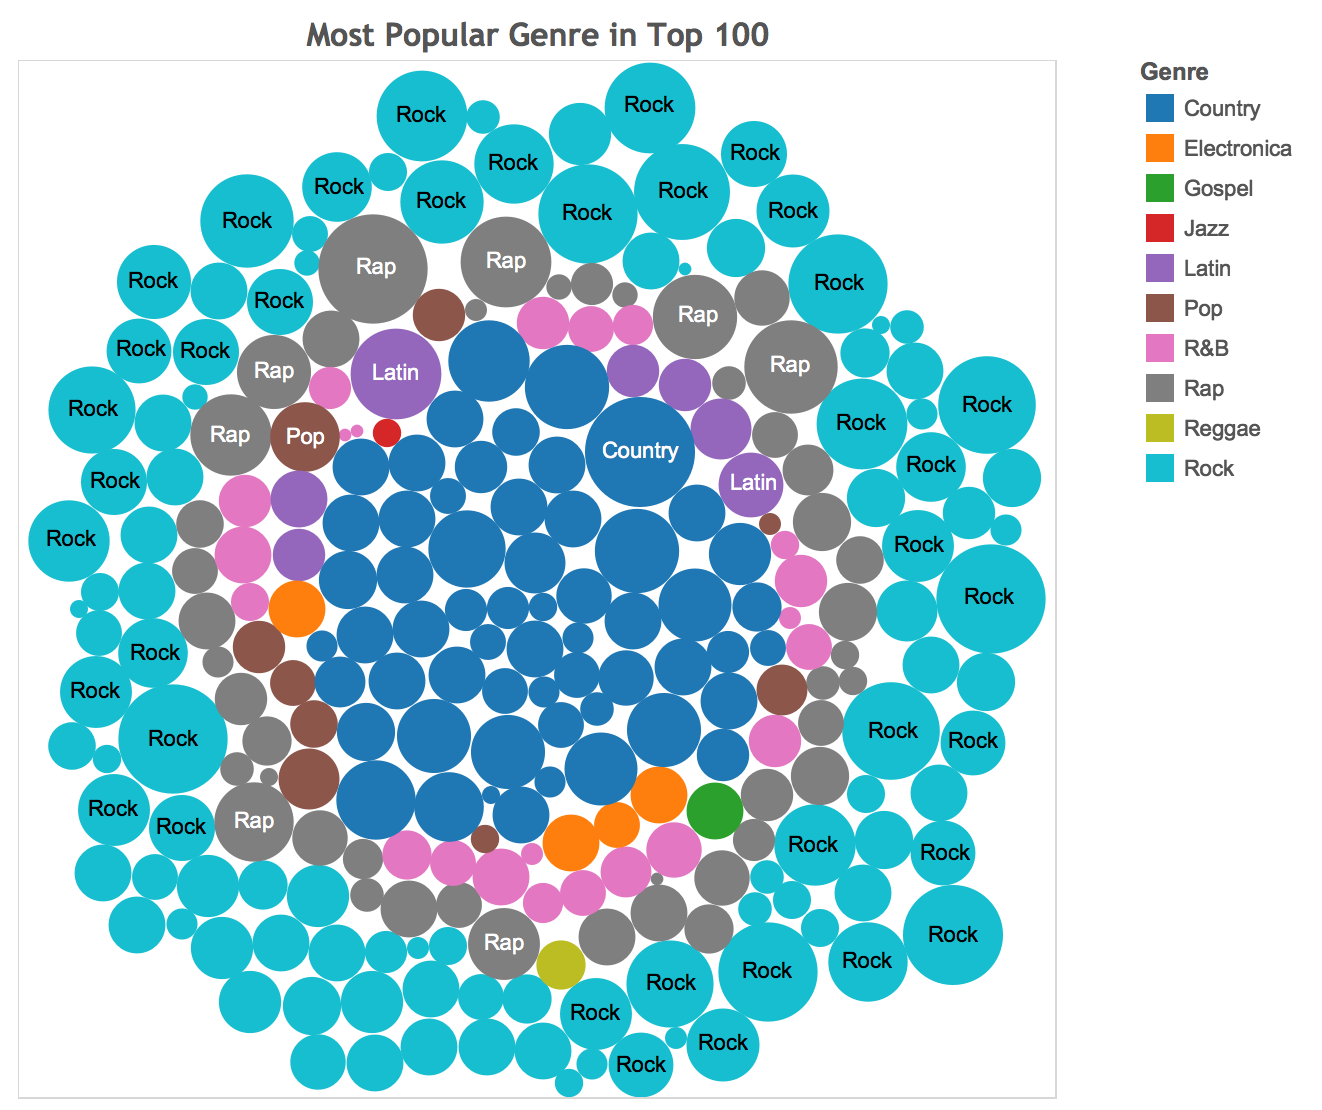

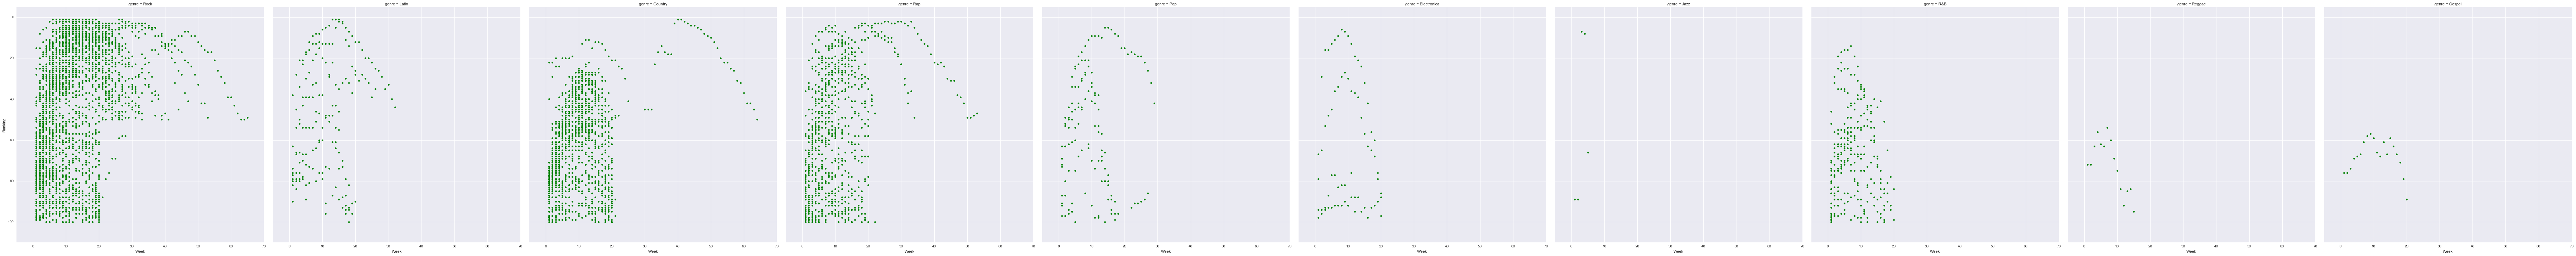

In [32]:
from IPython.display import Image
from IPython.display import display
%matplotlib inline

x = Image(filename='../assets/Most Popular Genre.png')
display(x)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#MG This chart is not easy to view.
g = sns.FacetGrid(newDF, col="genre", size = 10,)  
g.map(plt.scatter, "Week", "Ranking", color = 'g')
g.set(xlim=(-5, 70), ylim=(110, -5))
g.savefig("genres.png")

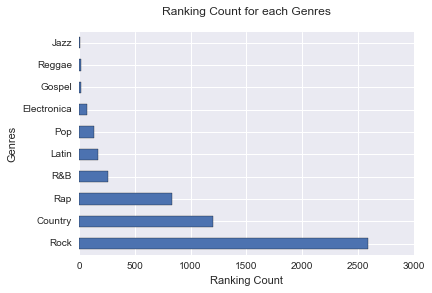

In [31]:
top_genres = newDF.genre.value_counts()
top_genres.plot(kind='barh')
plt.xlabel('Ranking Count')
plt.ylabel('Genres')
plt.title('Ranking Count for each Genres\n')
plt.show()

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

The gnaSLee(g-nas-lee) Record Label produces mainly reggae music. However, they were not able to stay in the Billboard ranking as long as they hoped. It was also very hard to break into the rankings in the first place. What type of music should gnaSLee Record Label produce to have a greater chance of breaking into Billboard ranking and stay in the ranking for a long time. My hypothesis is that rap is the most popular genre in the year 2000 due to the increase in popularity of southern hip hop. Therefore, SLee Record Label should aim to produce Rap music. 

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

- clean the data
- isolate each genres and find certain patterns using different graphs
- test the hypothesis
- conclude and answer the problem statement

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

The gnaSLee(g-nas-lee) Record Label produces mainly reggae music. However, it was very hard to break into the rankings in the first place in year 2000. Also, they were not able to stay in the Billboard ranking as long as they hoped. To further increase the business, they were planning on pursuing a different genre. What type of music should gnaSLee Record Label produce to have a greater chance of breaking into Billboard ranking and stay in the ranking for a long time? My hypothesis is that rap is the most popular genre in the year 2000 due to the increase in popularity of southern hip hop. Therefore, gnaSLee Record Label should aim to produce Rap music.
    
There is only one data file available. It is called "Billboard.csv". This data gives you a raw data of all the music that has been on the billboard chart in the year of 2000 including artist name, track name, length of each tracks, when each songs entered and peaked in the ranking, and rank of each week if they were in the billboard chart. The raw data needs to be cleaned up since there are some missing data.
    
I initially cleaned up column names for weeks. I thought it was more intuitive to say "Week 1" instead of "x1st week". I changed few more column names that I thought was labeled badly. After labeling all the columns to my personal preference, I transposed the table so that table listed all the artist and songs that were in the rankings for week 1. Then, it listed all the artist and songs in the rankings for week 2 and so on. By doing so, the data is easier to sort through because we can use this cleaned up data to look at all the rankings for each weeks. 
    
For data visualization, I used three different graphs. One is a packed bubble graph from Tableau. This one gives you bubbles for each artists and the size of the bubble depends on how many of their songs were in top 100 for how many weeks. All the bubbles are color coded by genres. The second graph was made using seaborn. To see the frequency in the top 100 ranking, I divided the graphs up for each genres. Each data points represent a song that was in the ranking. For the last graph, I created a bar chart for the actual count of hit songs in top 10. This graph shows which genre had the most hit songs upto the genre with least hit songs. From all the graphs, it is clear that rock genre had the most hit songs. Therefore, gnaSLee should look into making more rock songs rather than reggae or rap.
    
There was one pattern that I recognized looking at the scatter plots generated using seaborn. After week 20, there are practically no songs left under rank 50. There must be a reason for this sudden chop of data. For future studies, I will investigate more on which artists had the most hit songs, which songs had the longest streak of staying in the ranking for each genres, and find out the reason of why there was a sudden absence of data from week 20. 
    

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 

Score | 16/24
----- | ------
Identify: Problem Statement / Hypothesis    |  2            
Identify: Risks & Assumptions                | 2
Acquire: Import Data Using Pandas            | 3
Parse: Perform EDA Using Pandas                | 2
Mine: Plot Data & Generate Visuals            | 1
Mine: Determine Correlations                | 2
Refine: Evaluate Findings                    | 2
Present: Describe Results in Blog Post        | 2
Bonus! Present: Write a short White Paper    | 0